In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

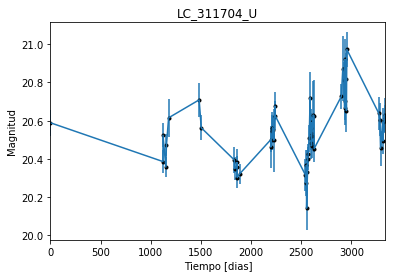

In [2]:
data = np.genfromtxt('LC_311704_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_311704_U')
plt.savefig("LC_311704_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

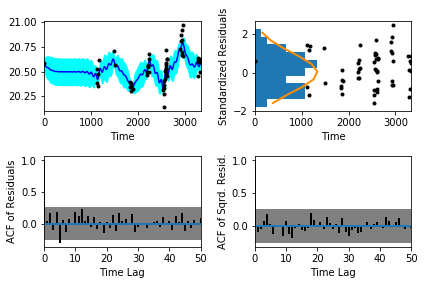

In [5]:
sample.assess_fit()

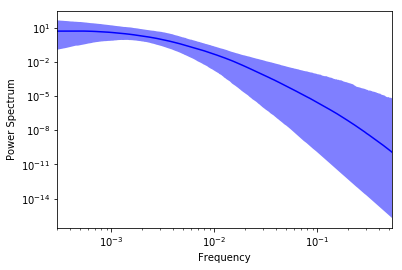

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

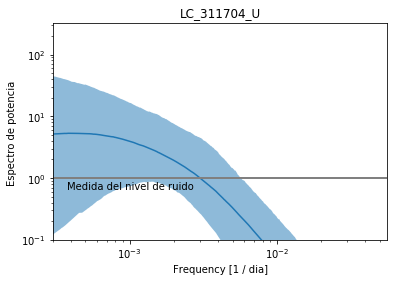

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_311704_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_311704_U')

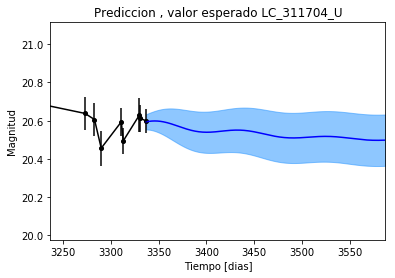

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_311704_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_311704_U')

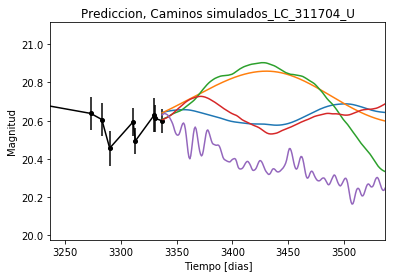

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_311704_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


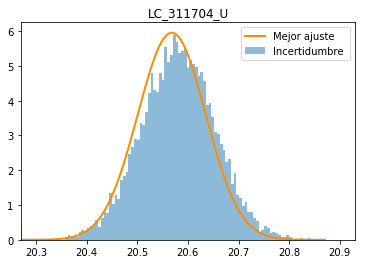

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_311704_U')
plt.savefig("Mejor_ajuste_LC_311704_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_311704_U')

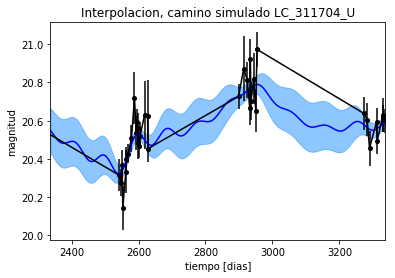

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311704_U')

Text(0.5,1,'Interpolacion, camino simulado LC_311704_U')

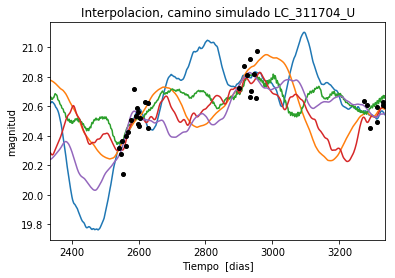

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311704_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 779.648121983
Median: 0.0122983875338
Standard deviation: 0.19004636204
68% credibility interval: [ 0.0012319   0.18001724]
95% credibility interval: [  3.91022911e-04   7.52476686e-01]
99% credibility interval: [  3.22851414e-04   9.91775258e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 582.013331665
Median: 0.00252771899741
Standard deviation: 0.0765581646482
68% credibility interval: [ 0.00061817  0.02782243]
95% credibility interval: [ 0.00034663  0.20735725]
99% credibility interval: [  3.07372128e-04   5.58716074e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 671.677135192
Median: 0.0308928319985
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1365.24952423
Median: 74.5014105969
Standard deviation: 1.63721732408
68% credibility interval: [ 72.70494977  75.77718191]
95% credibility interval: [ 70.31337595  76.47186015]
99% credibility interval: [ 68.04430333  76.76456926]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1743.76257541
Median: 0.759760874964
Standard deviation: 2.16144007302
68% credibility interval: [ 0.09749818  3.86925002]
95% credibility interval: [ 0.02219337  7.07026293]
99% credibility interval: [  0.01221507  10.55870782]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 393.564641476
Median: 0.349549300451
Standard deviation: 9.02585595179
68% credibility interval: [ 0.01408467  6.90743976]
95% credibility interval: [  1.78915572e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19086.3475054
Median: 3.51702326359e-14
Standard deviation: 2.25850318354e+53
68% credibility interval: [  1.95933805e-76   3.09039479e+22]
95% credibility interval: [  9.12081010e-106   4.90293872e+045]
99% credibility interval: [  3.56777741e-134   1.66580390e+049]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3497.96097642
Median: 20.539384037
Standard deviation: 0.0689624276934
68% credibility interval: [ 20.48465508  20.59959511]
95% credibility interval: [ 20.40503841  20.68893956]
99% credibility interval: [ 20.32670718  20.77894232]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 193.766048195
Median: 0.00376067045191
Standard deviation: 0.235074668306
68% credibility interval: [ 0.          0.27745218]
95% credibility interval: [ 0.          0.87555977]
99% credibility interval: [ 0.          1.00809185]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 193.766048195
Median: 0.00376067045191
Standard deviation: 0.235074668306
68% credibility interval: [ 0.          0.27745218]
95% credibility interval: [ 0.          0.87555977]
99% credibility interval: [ 0.          1.00809185]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 686.427125015
Median: 0.0
Standard deviation: 0.000883966486529
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1365.24952423
Median: 74.5014105969
Standard deviation: 1.63721732408
68% credibility interval: [ 72.70494977  75.77718191]
95% credibility interval: [ 70.31337595  76.47186015]
99% credibility interval: [ 68.04430333  76.76456926]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1540.5977404
Median: 0.0262401409862
Standard deviation: 0.0253433243615
68% credibility interval: [ 0.01581779  0.04880335]
95% credibility interval: [ 0.01029342  0.09769871]
99% credibility interval: [ 0.00773902  0.16027647]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2084.70080308
Median: 0.929713148421
Standard deviation: 0.145563185651
68% credibility interval: [ 0.79842575  1.0834207 ]
95% credibility interval: [ 0.69680029  1.25928907]
99% credibility interval: [ 0.63796841  1.3905706 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 968.697390157
Median: 0.000163852069018
Standard deviation: 0.205258552847
68% credibility interval: [  1.70416249e-26   1.11670272e-02]
95% credibility interval: [  2.18390834e-49   1.66027566e-01]
99% credibility interval: [  1.25718254e-52   7.50754030e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 779.648121983
Median: (-0.0772730478542+0j)
Standard deviation: 1.89932824082
68% credibility interval: [-1.13108167-5.77688897j -0.00774027-2.15485055j]
95% credibility interval: [ -4.72795046e+00+0.j          -2.45686941e-03-0.02151943j]
99% credibility interval: [ -6.23150773e+00+0.j          -2.02853526e-03-0.02088536j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 582.013331665
Median: (-0.0158821268652+1.59754453548j)
Standard deviation: 1.553373851
68% credibility interval: [-0.17481350+0.21619462j -0.00388409+0.01117655j]
95% credibility interval: [-1.30286400+1.36208609j -0.00217795+0.0040002j ]
99% credibility interval: [ -3.51051663e+00 +2.44350667e+00j  -1.93127604e-03 +4.89885282e-04j]
Posterior summary 